## Sumário:
- EDA 
- Treinamento
- Validação

## Objetivo
NCJNet é um modelo preditivo que visa sugerir cursos para o usuário, a predição é feito sob análise de notas e preferência do usuário.

## Configuração do Ambiente
É necessário o ambiente virtual para o funcionamento, para isso, realize os seguintes comandos no terminal
- /NCJNet$ pipenv shell
- /NCJNet$ pipenv install

Após isso, o ambiente está configurado com todas as bibliotecas necessárias. Para verificar, compile o código a baixo.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    f1_score
)

# Todas as bibliotecas são necessárias para a compilação

# EDA

In [31]:
import pandas as pd
import seaborn as sns

## Criar DataFrames dos Datasets 

In [32]:
# carregamento do dataset disponibilizado pela Rubeus
df = pd.read_csv('./datasets/RegistroAcompanhamento.csv') # leitura dos dados do csv

# visualizar os dados dos 5 primeiros clientes
df.head(5)

,Identificador,"""Codigo externo do registro""",Etapa,"""Data da criacao""","""Momento do ultimo ganho""","""Momento da ultima perda""","""Na mesma etapa desde""","""Codigo - Oferta de curso""","""Nome - Oferta de curso""","""Identificador da pessoa""",...,Redacao,Quimica,Fisica,Biologia,Geografia,Historia,Filosofia,Sociologia,Artes,Curso
0,318,"""- - -""","""- - -""","""16/06/2025 20:02""","""- - -""","""- - -""","""- - -""","""- - -""","""- - -""",360,...,90,89,88,86,87,99,86,85,89,Biblioteconomia
1,317,"""- - -""","""- - -""","""16/06/2025 20:00""","""- - -""","""- - -""","""- - -""","""- - -""","""- - -""",359,...,76,76,75,79,78,90,73,80,81,Biblioteconomia
2,316,"""- - -""","""- - -""","""16/06/2025 19:59""","""- - -""","""- - -""","""- - -""","""- - -""","""- - -""",358,...,63,63,61,59,60,83,74,73,76,Biblioteconomia
3,315,"""- - -""","""- - -""","""16/06/2025 19:57""","""- - -""","""- - -""","""- - -""","""- - -""","""- - -""",357,...,69,71,70,69,66,89,68,64,66,Biblioteconomia
4,314,"""- - -""","""- - -""","""16/06/2025 19:55""","""- - -""","""- - -""","""- - -""","""- - -""","""- - -""",356,...,71,89,63,68,87,88,89,90,91,Museologia


In [33]:
# estrutura / schema do DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 61 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Identificador                        300 non-null    object
 1    "Codigo externo do registro"        300 non-null    object
 2    Etapa                               300 non-null    object
 3    "Data da criacao"                   300 non-null    object
 4    "Momento do ultimo ganho"           300 non-null    object
 5    "Momento da ultima perda"           300 non-null    object
 6    "Na mesma etapa desde"              300 non-null    object
 7    "Codigo - Oferta de curso"          300 non-null    object
 8    "Nome - Oferta de curso"            300 non-null    object
 9    "Identificador da pessoa"           300 non-null    int64 
 10   "Codigo externo da pessoa"          300 non-null    object
 11   "Nome da pessoa"                    300 non-

### Selecionar apenas dados necessários

In [40]:
colunas_desejadas = [
	"Matematica",
	"Portugues", 
	"Literatura",
	"Redacao",
	"Quimica",
	"Fisica",
	"Biologia",
	"Geografia",
	"Historia",
	"Filosofia",
	"Sociologia",
	"Artes",
	'Area de Preferencia', 
	"Curso"
]

# remover espaços dos nomes das colunas
df.columns = df.columns.str.strip()

# verificar nomes das colunas após strip
print(df.columns.tolist())


# filtrar as colunas
df_filtrado = df[colunas_desejadas].copy()
df_filtrado.info()

['Identificador', '"Codigo externo do registro"', 'Etapa', '"Data da criacao"', '"Momento do ultimo ganho"', '"Momento da ultima perda"', '"Na mesma etapa desde"', '"Codigo - Oferta de curso"', '"Nome - Oferta de curso"', '"Identificador da pessoa"', '"Codigo externo da pessoa"', '"Nome da pessoa"', '"Nome do responsavel"', 'Atividade', '"E-mail da pessoa"', '"E-mails secundarios"', '"Telefone da pessoa"', '"Telefones secundarios"', 'CPF', '"Data de nascimento"', '"Valor da oportunidade"', '"Data da atividade"', '"Forma de ingresso"', '"Grau de instrucao"', '"Escola de origem"', '"Nota do ENEM"', '"Processo seletivo"', 'Unidade', 'Modalidade', 'Status', '"Local da oferta"', 'Canal', '"Resumo atual"', 'Objecao', '"Observacoes da perda"', 'Endereco', 'Numero', 'Bairro', 'Cidade', 'UF', 'Concorrentes', 'Probabilidade', '"[AE] Situacao de matricula"', 'Area de Preferencia', '"[AE] % de nota geral"', '"[AE] % de frequencia geral"', '"[AE] Satisfacao"', '"[AE] Qtd de lancamentos Vencidos"', 

In [41]:
df_filtrado.head(5)

,Matematica,Portugues,Literatura,Redacao,Quimica,Fisica,Biologia,Geografia,Historia,Filosofia,Sociologia,Artes,Area de Preferencia,Curso
0,82,96,98,90,89,88,86,87,99,86,85,89,Humanas,Biblioteconomia
1,80,90,89,76,76,75,79,78,90,73,80,81,Humanas,Biblioteconomia
2,65,78,80,63,63,61,59,60,83,74,73,76,Humanas,Biblioteconomia
3,70,90,88,69,71,70,69,66,89,68,64,66,Humanas,Biblioteconomia
4,74,72,69,71,89,63,68,87,88,89,90,91,Humanas,Museologia


In [42]:
# estatísticas do DF
df_filtrado.describe()

,Matematica,Portugues,Literatura,Redacao,Quimica,Fisica,Biologia,Geografia,Historia,Filosofia,Sociologia,Artes
count,300.000000,300.000000,300.000000,300.000000,300.0000,300.00000,300.000000,300.000000,300.000000,300.000000,300.00000,300.000000
mean,80.233333,77.190000,77.546667,77.336667,78.4400,79.41000,79.600000,77.813333,78.776667,78.100000,78.35000,78.823333
std,11.578100,9.577735,9.072791,9.430435,10.1609,10.61402,10.555792,8.762864,8.803320,9.097943,9.98096,10.090168
min,58.000000,58.000000,59.000000,48.000000,52.0000,50.00000,43.000000,57.000000,60.000000,59.000000,41.00000,53.000000
25%,69.000000,68.000000,71.000000,70.000000,71.0000,72.00000,72.750000,72.000000,73.750000,73.000000,72.00000,71.000000
50%,80.000000,78.000000,78.000000,77.500000,79.0000,80.00000,80.000000,79.000000,79.000000,79.000000,79.00000,79.000000
75%,90.000000,85.000000,84.000000,84.000000,86.0000,88.25000,88.000000,82.000000,84.000000,84.000000,86.00000,87.000000
max,100.000000,99.000000,99.000000,99.000000,99.0000,99.00000,99.000000,98.000000,99.000000,98.000000,99.00000,99.000000


## "Limpando" as features  

In [43]:
df_filtrado['Curso'] = df_filtrado['Curso'].astype(str).str.strip() # corrige possíveis espaços extras
df_filtrado['Area de Preferencia'] = df_filtrado['Area de Preferencia'].astype(str).str.strip() # corrige possíveis espaços extras

# corrige encoding dos nomes dos cursos e áreas
df_filtrado['Curso'] = df_filtrado['Curso'].apply(lambda x: x.encode('latin1').decode('utf-8') if isinstance(x, str) else x)
df_filtrado['Area de Preferencia'] = df_filtrado['Area de Preferencia'].apply(lambda x: x.encode('latin1').decode('utf-8') if isinstance(x, str) else x)

areas_cursos = dict(zip(df_filtrado['Curso'], df_filtrado['Area de Preferencia']))

len(areas_cursos)

60

## Dicionários por área

In [44]:
areas_unicas = df_filtrado['Area de Preferencia'].unique() # lista com as áreas separadas

utils = {} # dicionário para armazenar os dados processados

modelos_por_area = {
    areas_unicas[0].strip(): {
        "model": None,
        "acc": -float('inf'),
        "true_labels": None,
        "predict_labels": None,
        "predict_proba": None
        },
    areas_unicas[1].strip(): {
        "model": None,
        "acc": -float('inf'),
        "true_labels": None,
        "predict_labels": None,
        "predict_proba": None
        },
    areas_unicas[2].strip(): {
        "model": None,
        "acc": -float('inf'),
        "true_labels": None,
        "predict_labels": None,
        "predict_proba": None
        },
    areas_unicas[3].strip(): {
        "model": None,
        "acc": -float('inf'),
        "true_labels": None,
        "predict_labels": None,
        "predict_proba": None
        },
    areas_unicas[4].strip(): {
        "model": None,
        "acc": -float('inf'),
        "true_labels": None,
        "predict_labels": None,
        "predict_proba": None
        },
    areas_unicas[5].strip(): {
        "model": None,
        "acc": -float('inf'),
        "true_labels": None,
        "predict_labels": None,
        "predict_proba": None
        },
    areas_unicas[6].strip(): {
        "model": None,
        "acc": -float('inf'),
        "true_labels": None,
        "predict_labels": None,
        "predict_proba": None
        },
    areas_unicas[7].strip(): {
        "model": None,
        "acc": -float('inf'),
        "true_labels": None,
        "predict_labels": None,
        "predict_proba": None
        }
}

## Features e transformação dos dados

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import numpy as np
import xgboost as xgb

feature_cols = ['Matematica', 'Portugues', 'Literatura', 'Redacao', 'Quimica', 'Fisica', 'Biologia', 'Geografia', 'Historia', 'Filosofia', 'Sociologia', 'Artes','Area de Preferencia']

scaler = StandardScaler()  # inicializa para normalizar os dados

for area in areas_unicas:
    # filtra o dataframe para a área atual
    df_area = df_filtrado[df_filtrado['Area de Preferencia'] == area].copy()
    
    # separa as features (notas por disciplina)
    X = df_area[feature_cols].copy()
    X_numeric = X.drop(columns=['Area de Preferencia'])
    
    # rótulo (curso que o aluno faz)
    y_categorico = df_area["Curso"]

    # transformar a variável curso para formato numérico
    label_curso = LabelEncoder()
    y = label_curso.fit_transform(y_categorico)
    
    # armazena os dados processados para cada área
    utils[area.strip()] = {
        'X': X_numeric,
        'y': y,
        'label': label_curso
    }

# Treinamento

## Treinamento com Random Forest

In [48]:
kf_rf = StratifiedKFold(n_splits=5, shuffle=True, random_state=None) # validação cruzada estratificada

K_TOP = 3 # número de classes a serem consideradas

for area in areas_unicas:
    
    y_labels_rf = []
    y_predict_rf = []
    y_proba_rf = [] 

    topKaccRF = [] # lista para armazenar o Top-K Accuracy de cada fold
    area = area.strip()  # remove espaços extras
    
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42, oob_score=True,max_depth=20,criterion='gini') # modelo Random Forest
    
    print(area)
    
    for train, test in kf_rf.split(utils[area]["X"], utils[area]["y"]): 
            
            # divisão dos dados em conjunto de treinamento e teste
            X_train_fold, X_test_fold = utils[area]["X"].iloc[train], utils[area]["X"].iloc[test] 
            y_train_fold, y_test_fold = utils[area]["y"][train], utils[area]["y"][test] 


            # normalização dos dados
            X_train_normalizado = scaler.fit_transform(X_train_fold)
            X_test_normalizado = scaler.transform(X_test_fold)
            
            # treina o modelo com esse conjunto de treinamento
            rf_model.fit(X_train_normalizado, y_train_fold)
            
            # predições de teste
            y_test_pred = rf_model.predict_proba(X_test_normalizado)
            
            correct_predictions_top_k = 0
            total_predictions = len(y_test_fold)

            for i, true_label_idx in enumerate(y_test_fold):
                probabilities = y_test_pred[i]
                
                K_TOP = 1 if area == 'Linguagens' else K_TOP # ajuste para linguagens que possui apenas 2 cursos
                top_k_predicted_indices = np.argsort(probabilities)[::-1][:K_TOP] # pega os índices das K_TOP classes com maior probabilidade
                
                # verificar se a classe verdadeira está entre as K_TOP preditas
                if true_label_idx in top_k_predicted_indices:
                    correct_predictions_top_k += 1 # conta como acerto se a classe verdadeira está entre as K_TOP preditas
            
            # calcula a acurácia Top-K para este fold
            fold_top_k_accuracy = correct_predictions_top_k / total_predictions if total_predictions > 0 else 0
            topKaccRF.append(fold_top_k_accuracy)
            
            # para classification_report e confusion_matrix, ainda precisamos das predições de classe
            y_test_pred_single_class = np.argmax(y_test_pred, axis=1) # pega a classe com maior probabilidade
            
            y_labels_rf.extend(y_test_fold)
            y_predict_rf.extend(y_test_pred_single_class) #pPara as métricas tradicionais
            y_proba_rf.extend(y_test_pred)  # armazena as probabilidades para o AUC

            
    # calcula a acurácia Top-K para a área        
    mean_top_k_accuracy = np.mean(topKaccRF)
    
    if mean_top_k_accuracy > modelos_por_area[area]["acc"]: # se a acurácia média é maior que a armazenada
        modelos_por_area[area]["model"] = rf_model # atualiza o modelo 
        modelos_por_area[area]["acc"] = mean_top_k_accuracy # atualiza a acurácia média
        modelos_por_area[area]["true_labels"] = y_labels_rf # armazena os rótulos verdadeiros
        modelos_por_area[area]["predict_labels"] = y_predict_rf # armazena as predições de classe
        modelos_por_area[area]["predict_proba"] = y_proba_rf # armazena as probabilidades de predição
        
        
    print(f"Cursos: {utils[area]['label'].classes_}")
        
    print(f"\n--- Avaliação do modelo Random Forest para {area} (Apenas Top-{K_TOP} Accuracy) ---")
    print(f"Top-{K_TOP} Accuracy médio (validação cruzada): {mean_top_k_accuracy:.4f}")
    print(f"Top-{K_TOP} Accuracy mínimo por fold: {np.min(topKaccRF):.4f}")
    print(f"Top-{K_TOP} Accuracy máximo por fold: {np.max(topKaccRF):.4f}")

Humanas


/home/nicolas/.local/share/virtualenvs/NCJNet-xGDSlkFY/lib/python3.11/site-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Cursos: ['Administracao' 'Biblioteconomia' 'Ciencias Sociais' 'Direito'
 'Filosofia' 'Geografia' 'Historia' 'Museologia' 'Pedagogia' 'Psicologia'
 'Relacoes Internacionais' 'Servico Social' 'Sociologia']

--- Avaliação do modelo Random Forest para Humanas (Apenas Top-3 Accuracy) ---
Top-3 Accuracy médio (validação cruzada): 0.5551
Top-3 Accuracy mínimo por fold: 0.5000
Top-3 Accuracy máximo por fold: 0.6154
Artes
Cursos: ['Artes Cenicas' 'Artes Plasticas' 'Artes Visuais' 'Cinema' 'Danca'
 'Design' 'Design Grafico' 'Design de Interiores' 'Moda' 'Teatro']

--- Avaliação do modelo Random Forest para Artes (Apenas Top-3 Accuracy) ---
Top-3 Accuracy médio (validação cruzada): 0.6109
Top-3 Accuracy mínimo por fold: 0.4545
Top-3 Accuracy máximo por fold: 0.7000
Linguagens
Cursos: ['Letras' 'Linguistica']

--- Avaliação do modelo Random Forest para Linguagens (Apenas Top-1 Accuracy) ---
Top-1 Accuracy médio (validação cruzada): 0.7000
Top-1 Accuracy mínimo por fold: 0.5000
Top-1 Accuracy máxim

/home/nicolas/.local/share/virtualenvs/NCJNet-xGDSlkFY/lib/python3.11/site-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Cursos: ['Arquitetura e Urbanismo' 'Engenharia Ambiental' 'Engenharia Civil'
 'Engenharia Eletrica' 'Engenharia Mecanica' 'Engenharia Quimica'
 'Engenharia de Alimentos' 'Engenharia de Producao' 'Fisica'
 'Gestao Ambiental' 'Matematica' 'Quimica']

--- Avaliação do modelo Random Forest para Exatas (Apenas Top-1 Accuracy) ---
Top-1 Accuracy médio (validação cruzada): 0.4242
Top-1 Accuracy mínimo por fold: 0.4167
Top-1 Accuracy máximo por fold: 0.4545
Comunicacao
Cursos: ['Jornalismo' 'Marketing' 'Publicidade e Propaganda' 'Relacoes Publicas']

--- Avaliação do modelo Random Forest para Comunicacao (Apenas Top-1 Accuracy) ---
Top-1 Accuracy médio (validação cruzada): 0.6300
Top-1 Accuracy mínimo por fold: 0.4000
Top-1 Accuracy máximo por fold: 0.7500


## Treinamento com XGBoost


In [ ]:
kf_xgb = StratifiedKFold(n_splits=5, shuffle=True, random_state=None) # validação cruzada estratificada

K_TOP = 3 # número de classes a serem consideradas


for area in areas_unicas:
    
    y_labels_xgb = []
    y_predict_xgb = []
    y_proba_xgb = []
    
    area = area.strip()  # remove espaços extras
    
    topKaccXGB = [] # lista para armazenar o Top-K Accuracy de cada fold
    
    params = {"objective": "multi:softprob", "tree_method": "hist", "num_class": len(np.unique(y))}
    
    n = 1000

    # instanciar o modelo XGBoost
    xgb_model = xgb.XGBClassifier(
    objective="multi:softmax",
    tree_method="hist",
    num_class=len(np.unique(y)),
    n_estimators=n,
    eval_metric="mlogloss",
    verbosity=1,
    random_state=42,
    )
    
    print(area)
    
    for train, test in kf_xgb.split(utils[area]["X"],utils[area]["y"]):
            
            # divisão dos dados em conjunto de treinamento e teste
            X_train_fold, X_test_fold = utils[area]["X"].iloc[train], utils[area]["X"].iloc[test] 
            y_train_fold, y_test_fold = utils[area]["y"][train], utils[area]["y"][test] 

            # normalização dos dados
            X_train_normalizado = scaler.fit_transform(X_train_fold)
            X_test_normalizado = scaler.transform(X_test_fold)

            # treina o modelo com esse conjunto de treinamento
            xgb_model.fit(X_train_normalizado, y_train_fold)
            
            # predições de teste
            y_test_pred = xgb_model.predict_proba(X_test_normalizado)
            
            correct_predictions_top_k = 0
            total_predictions = len(y_test_fold)

            for i, true_label_idx in enumerate(y_test_fold):
                probabilities = y_test_pred[i]
                
                K_TOP = 1 if area == 'Linguagens' else K_TOP # ajuste para linguagens que possui apenas 2 cursos
                
                top_k_predicted_indices = np.argsort(probabilities)[::-1][:K_TOP] # pega os índices das K_TOP classes com maior probabilidade
                
                # verificar se a classe verdadeira está entre as K_TOP preditas
                if true_label_idx in top_k_predicted_indices:
                    correct_predictions_top_k += 1 # conta como acerto se a classe verdadeira está entre as K_TOP preditas
            
            # calcula a acurácia Top-K para este fold
            fold_top_k_accuracy = correct_predictions_top_k / total_predictions if total_predictions > 0 else 0
            topKaccXGB.append(fold_top_k_accuracy)
            
            # para classification_report e confusion_matrix, ainda precisamos das predições de classe
            y_test_pred_single_class = [true_label_idx if true_label_idx in top_k_predicted_indices else top_k_predicted_indices[0] for i, true_label_idx in enumerate(y_test_fold)] # Pega a classe com maior probabilidade

            y_labels_xgb.extend(y_test_fold)
            y_predict_xgb.extend(y_test_pred_single_class)
            y_proba_xgb.extend(y_test_pred)  # armazena as probabilidades para o AUC

    # calcula a acurácia Top-K para a área
    mean_top_k_accuracy = np.mean(topKaccXGB)
    
    if mean_top_k_accuracy > modelos_por_area[area]["acc"]: #  se a acurácia média é maior que a armazenada
        modelos_por_area[area]["model"] = xgb_model
        modelos_por_area[area]["acc"] = mean_top_k_accuracy
        modelos_por_area[area]["true_labels"] = y_labels_xgb
        modelos_por_area[area]["predict_labels"] = y_predict_xgb
        modelos_por_area[area]["predict_proba"] = y_proba_xgb
        
    print(f"Cursos: {utils[area]['label'].classes_}")
        
    print(f"\n--- Avaliação do modelo Random Forest para {area} (Apenas Top-{K_TOP} Accuracy) ---")
    print(f"Top-{K_TOP} Accuracy médio (validação cruzada): {mean_top_k_accuracy:.4f}")
    print(f"Top-{K_TOP} Accuracy mínimo por fold: {np.min(topKaccXGB):.4f}")
    print(f"Top-{K_TOP} Accuracy máximo por fold: {np.max(topKaccXGB):.4f}")
        

Humanas


/home/nicolas/.local/share/virtualenvs/NCJNet-xGDSlkFY/lib/python3.11/site-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Cursos: ['Administracao' 'Biblioteconomia' 'Ciencias Sociais' 'Direito'
 'Filosofia' 'Geografia' 'Historia' 'Museologia' 'Pedagogia' 'Psicologia'
 'Relacoes Internacionais' 'Servico Social' 'Sociologia']

--- Avaliação do modelo Random Forest para Humanas (Apenas Top-3 Accuracy) ---
Top-3 Accuracy médio (validação cruzada): 0.3987
Top-3 Accuracy mínimo por fold: 0.1667
Top-3 Accuracy máximo por fold: 0.7500
Artes
Cursos: ['Artes Cenicas' 'Artes Plasticas' 'Artes Visuais' 'Cinema' 'Danca'
 'Design' 'Design Grafico' 'Design de Interiores' 'Moda' 'Teatro']

--- Avaliação do modelo Random Forest para Artes (Apenas Top-3 Accuracy) ---
Top-3 Accuracy médio (validação cruzada): 0.5655
Top-3 Accuracy mínimo por fold: 0.5000
Top-3 Accuracy máximo por fold: 0.7273
Linguagens
Cursos: ['Letras' 'Linguistica']

--- Avaliação do modelo Random Forest para Linguagens (Apenas Top-1 Accuracy) ---
Top-1 Accuracy médio (validação cruzada): 1.0000
Top-1 Accuracy mínimo por fold: 1.0000
Top-1 Accuracy máxim

/home/nicolas/.local/share/virtualenvs/NCJNet-xGDSlkFY/lib/python3.11/site-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Cursos: ['Arquitetura e Urbanismo' 'Engenharia Ambiental' 'Engenharia Civil'
 'Engenharia Eletrica' 'Engenharia Mecanica' 'Engenharia Quimica'
 'Engenharia de Alimentos' 'Engenharia de Producao' 'Fisica'
 'Gestao Ambiental' 'Matematica' 'Quimica']

--- Avaliação do modelo Random Forest para Exatas (Apenas Top-1 Accuracy) ---
Top-1 Accuracy médio (validação cruzada): 0.3727
Top-1 Accuracy mínimo por fold: 0.2500
Top-1 Accuracy máximo por fold: 0.5000
Comunicacao
Cursos: ['Jornalismo' 'Marketing' 'Publicidade e Propaganda' 'Relacoes Publicas']

--- Avaliação do modelo Random Forest para Comunicacao (Apenas Top-1 Accuracy) ---
Top-1 Accuracy médio (validação cruzada): 0.7200
Top-1 Accuracy mínimo por fold: 0.2500
Top-1 Accuracy máximo por fold: 1.0000


## Treinamento com SVM

In [50]:
kf_svm = StratifiedKFold(n_splits=5, shuffle=True, random_state=None) # validação cruzada estratificada para SVM

K_TOP = 3 # número de classes a serem consideradas

for area in areas_unicas:
    
    y_labels_svm = []
    y_predict_svm = []
    y_proba_svm = [] 
    
    topKaccSVM = [] # lista para armazenar o Top-K Accuracy de cada fold
    
    area = area.strip()  # remova espaços extras

    # modelo SVM com kernel RBF 
    svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True)

    print(area)

    for train, test in kf_svm.split(utils[area]["X"], utils[area]["y"]):
        
        # divisão dos dados em conjunto de treinamento e teste
        X_train_fold, X_test_fold = utils[area]["X"].iloc[train], utils[area]["X"].iloc[test] 
        y_train_fold, y_test_fold = utils[area]["y"][train], utils[area]["y"][test] 
        
        # normalização dos dados
        X_train_normalizado = scaler.fit_transform(X_train_fold)
        X_test_normalizado = scaler.transform(X_test_fold)

        # treina o modelo com esse conjunto de treinamento
        svm_model.fit(X_train_normalizado, y_train_fold)
        
        # predições de teste
        y_test_pred = svm_model.predict_proba(X_test_normalizado)
        
        correct_predictions_top_k = 0
        total_predictions = len(y_test_fold)

        for i, true_label_idx in enumerate(y_test_fold):
            
            probabilities = y_test_pred[i] 
            
            K_TOP = 1 if area == 'Linguagens' else K_TOP  # ajuste para linguagens que possui apenas 2 cursos
            
            top_k_predicted_indices = np.argsort(probabilities)[::-1][:K_TOP] # pega os índices das K_TOP classes com maior probabilidade
            
            # verificar se a classe verdadeira está entre as K_TOP preditas
            if true_label_idx in top_k_predicted_indices:
                correct_predictions_top_k += 1
        
        # calcula a acurácia Top-K para este fold
        fold_top_k_accuracy = correct_predictions_top_k / total_predictions if total_predictions > 0 else 0
        topKaccSVM.append(fold_top_k_accuracy)
            
        # Para classification_report e confusion_matrix, ainda precisamos das predições de classe
        y_test_pred_single_class = [true_label_idx if true_label_idx in top_k_predicted_indices else top_k_predicted_indices[0] for i, true_label_idx in enumerate(y_test_fold)] # Pega a classe com maior probabilidade

        y_labels_svm.extend(y_test_fold)
        y_predict_svm.extend(y_test_pred_single_class)
        y_proba_svm.extend(y_test_pred)  # Armazena as probabilidades para cada amostra do fold
        
    # calcula a acurácia Top-K para a área
    mean_top_k_accuracy = np.mean(topKaccSVM)
    
    if mean_top_k_accuracy > modelos_por_area[area]["acc"]: # se a acurácia média é maior que a armazenada
        modelos_por_area[area]["model"] = rf_model # atualiza o modelo
        modelos_por_area[area]["acc"] = mean_top_k_accuracy # atualiza a acurácia média
        modelos_por_area[area]["true_labels"] = y_labels_svm # armazena os rótulos verdadeiros
        modelos_por_area[area]["predict_labels"] = y_predict_svm # armazena as predições de classe
        modelos_por_area[area]["predict_proba"] = y_proba_svm # armazena as probabilidades de predição
        
    print(f"Cursos: {utils[area]['label'].classes_}")
        
    print(f"\n--- Avaliação do modelo Random Forest para {area} (Apenas Top-{K_TOP} Accuracy) ---")
    print(f"Top-{K_TOP} Accuracy médio (validação cruzada): {mean_top_k_accuracy:.4f}")
    print(f"Top-{K_TOP} Accuracy mínimo por fold: {np.min(topKaccSVM):.4f}")
    print(f"Top-{K_TOP} Accuracy máximo por fold: {np.max(topKaccSVM):.4f}")

Humanas
Cursos: ['Administracao' 'Biblioteconomia' 'Ciencias Sociais' 'Direito'
 'Filosofia' 'Geografia' 'Historia' 'Museologia' 'Pedagogia' 'Psicologia'
 'Relacoes Internacionais' 'Servico Social' 'Sociologia']

--- Avaliação do modelo Random Forest para Humanas (Apenas Top-3 Accuracy) ---
Top-3 Accuracy médio (validação cruzada): 0.2026
Top-3 Accuracy mínimo por fold: 0.0833
Top-3 Accuracy máximo por fold: 0.4615
Artes


/home/nicolas/.local/share/virtualenvs/NCJNet-xGDSlkFY/lib/python3.11/site-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Cursos: ['Artes Cenicas' 'Artes Plasticas' 'Artes Visuais' 'Cinema' 'Danca'
 'Design' 'Design Grafico' 'Design de Interiores' 'Moda' 'Teatro']

--- Avaliação do modelo Random Forest para Artes (Apenas Top-3 Accuracy) ---
Top-3 Accuracy médio (validação cruzada): 0.3345
Top-3 Accuracy mínimo por fold: 0.1000
Top-3 Accuracy máximo por fold: 0.5000
Linguagens
Cursos: ['Letras' 'Linguistica']

--- Avaliação do modelo Random Forest para Linguagens (Apenas Top-1 Accuracy) ---
Top-1 Accuracy médio (validação cruzada): 0.2000
Top-1 Accuracy mínimo por fold: 0.0000
Top-1 Accuracy máximo por fold: 0.5000
Biologicas
Cursos: ['Agronomia' 'Biologia' 'Biomedicina' 'Engenharia Florestal' 'Farmacia'
 'Medicina Veterinaria' 'Nutricao']

--- Avaliação do modelo Random Forest para Biologicas (Apenas Top-1 Accuracy) ---
Top-1 Accuracy médio (validação cruzada): 0.0857
Top-1 Accuracy mínimo por fold: 0.0000
Top-1 Accuracy máximo por fold: 0.1429
Saude
Cursos: ['Educacao Fisica' 'Enfermagem' 'Fisioterapia' 

/home/nicolas/.local/share/virtualenvs/NCJNet-xGDSlkFY/lib/python3.11/site-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Cursos: ['Arquitetura e Urbanismo' 'Engenharia Ambiental' 'Engenharia Civil'
 'Engenharia Eletrica' 'Engenharia Mecanica' 'Engenharia Quimica'
 'Engenharia de Alimentos' 'Engenharia de Producao' 'Fisica'
 'Gestao Ambiental' 'Matematica' 'Quimica']

--- Avaliação do modelo Random Forest para Exatas (Apenas Top-1 Accuracy) ---
Top-1 Accuracy médio (validação cruzada): 0.1348
Top-1 Accuracy mínimo por fold: 0.0000
Top-1 Accuracy máximo por fold: 0.2500
Comunicacao
Cursos: ['Jornalismo' 'Marketing' 'Publicidade e Propaganda' 'Relacoes Publicas']

--- Avaliação do modelo Random Forest para Comunicacao (Apenas Top-1 Accuracy) ---
Top-1 Accuracy médio (validação cruzada): 0.3200
Top-1 Accuracy mínimo por fold: 0.0000
Top-1 Accuracy máximo por fold: 0.6000


## Melhores modelos

In [51]:
for area in areas_unicas:
    area = area.strip()  # remove espaços extras
    print(f"Área: {area}")
    print(f"Melhor modelo: {modelos_por_area[area]['model'].__class__.__name__}")
    print(f"Acurácia: {modelos_por_area[area]['acc']:.4f}")
    print()

Área: Humanas
Melhor modelo: RandomForestClassifier
Acurácia: 0.5551

Área: Artes
Melhor modelo: RandomForestClassifier
Acurácia: 0.6109

Área: Linguagens
Melhor modelo: XGBClassifier
Acurácia: 1.0000

Área: Biologicas
Melhor modelo: RandomForestClassifier
Acurácia: 0.3393

Área: Saude
Melhor modelo: XGBClassifier
Acurácia: 0.3333

Área: Tecnologia
Melhor modelo: XGBClassifier
Acurácia: 0.1333

Área: Exatas
Melhor modelo: RandomForestClassifier
Acurácia: 0.4242

Área: Comunicacao
Melhor modelo: XGBClassifier
Acurácia: 0.7200



## Salvar modelos

In [52]:
import joblib 

for area in areas_unicas:
    area = area.strip()  
    joblib.dump(modelos_por_area[area]['model'], f'./model/{area}_sugestor.pkl')
    joblib.dump(utils[area]['label'], f'./model/{area}_labelCurso.pkl')

# salvar encoder
joblib.dump(areas_cursos, './model/areaCursos.pkl')
joblib.dump(scaler, './model/scaler.pkl')

['./model/scaler.pkl']

# Comparação de Métodos

Humanas


/tmp/ipykernel_213712/116711447.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = get_cmap('tab10')


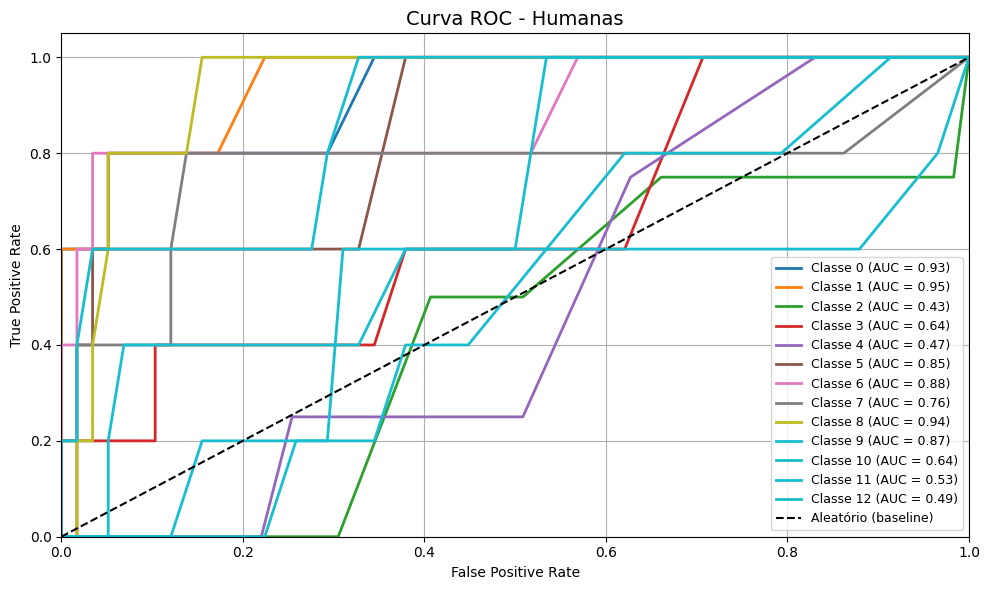

Artes


/tmp/ipykernel_213712/116711447.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = get_cmap('tab10')


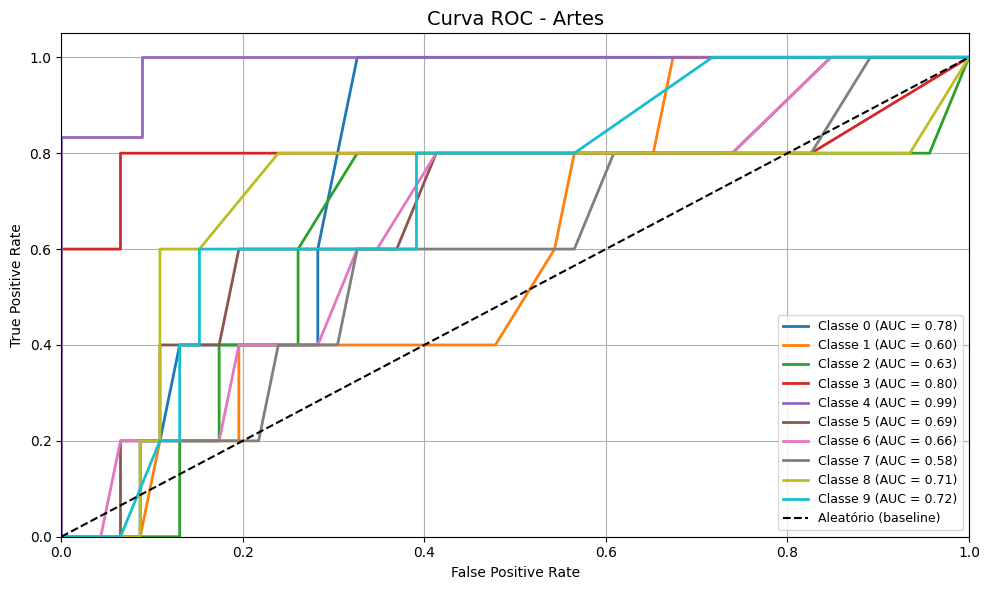

Linguagens
Biologicas


/tmp/ipykernel_213712/116711447.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = get_cmap('tab10')


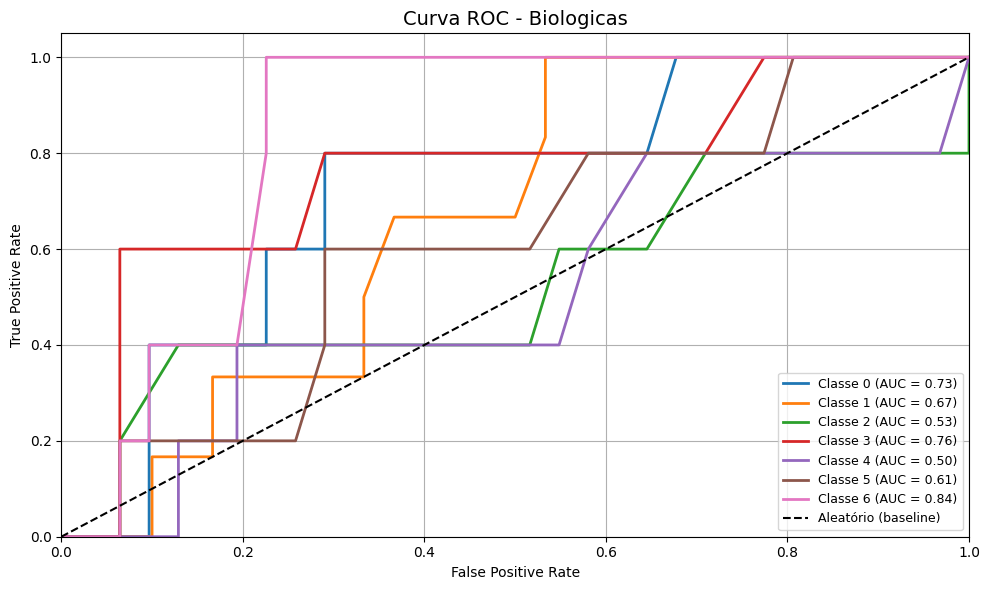

Saude


/tmp/ipykernel_213712/116711447.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = get_cmap('tab10')


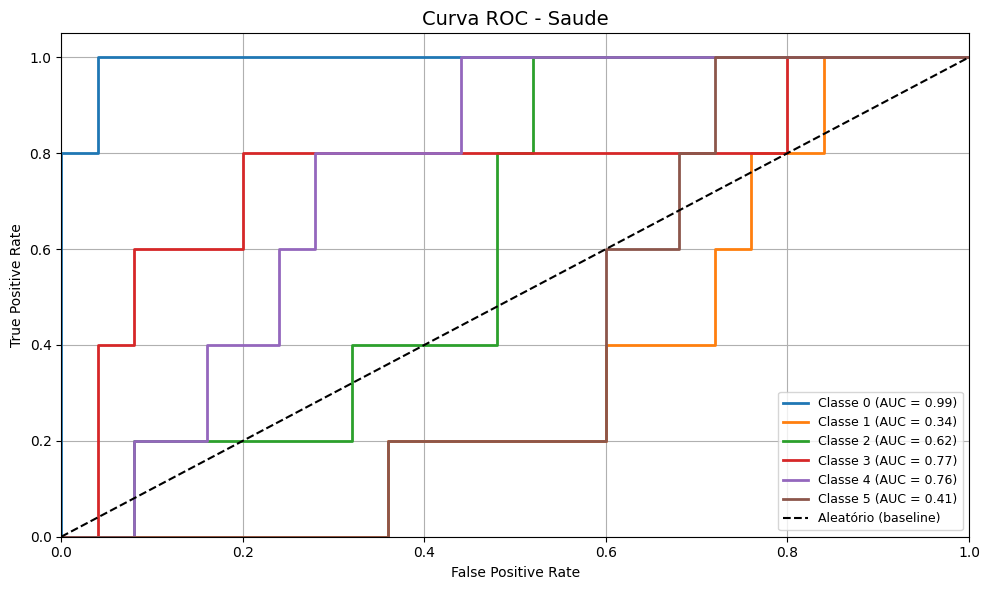

Tecnologia


/tmp/ipykernel_213712/116711447.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = get_cmap('tab10')


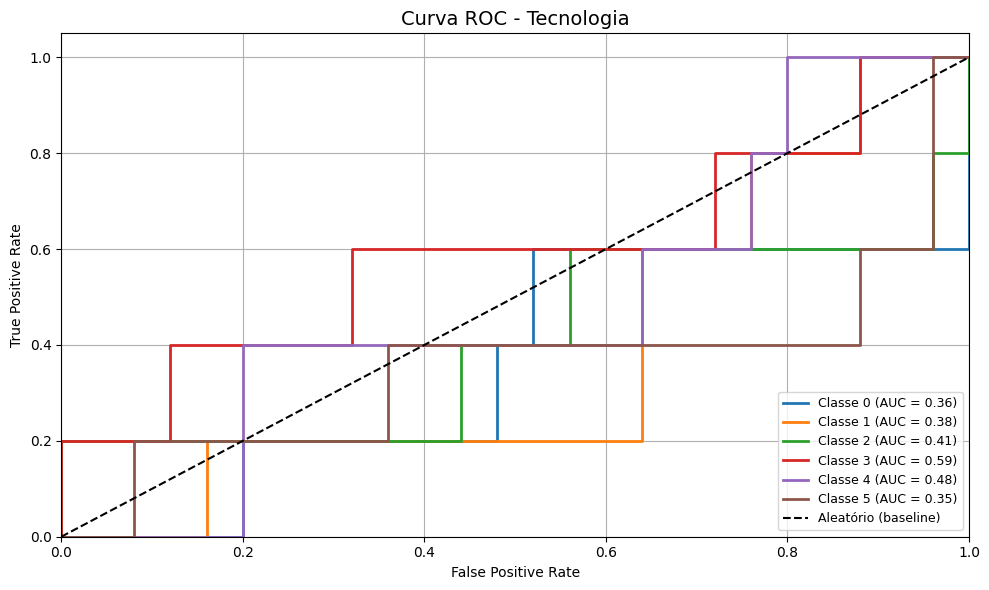

Exatas


/tmp/ipykernel_213712/116711447.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = get_cmap('tab10')


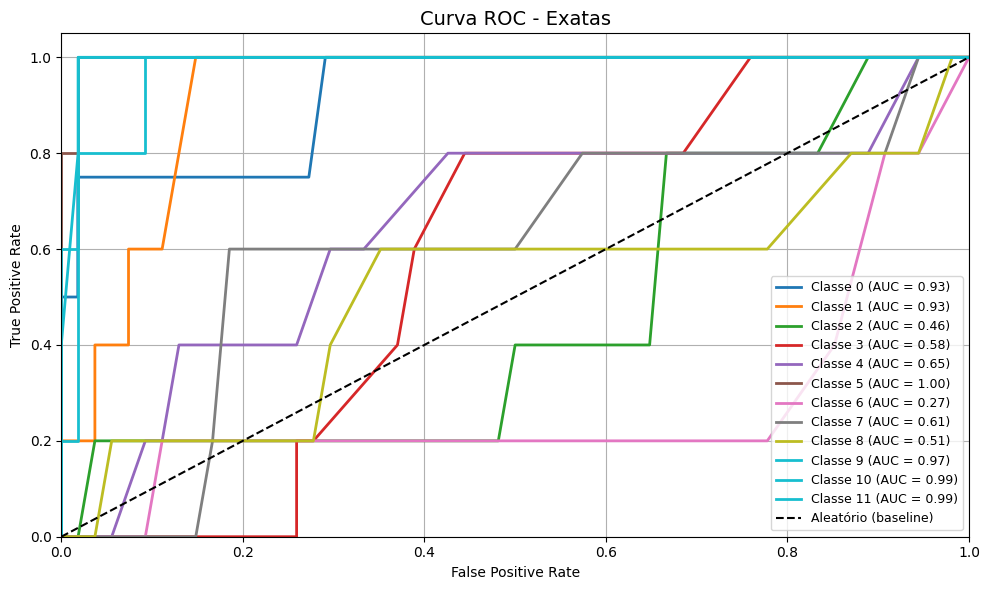

Comunicacao


/tmp/ipykernel_213712/116711447.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = get_cmap('tab10')


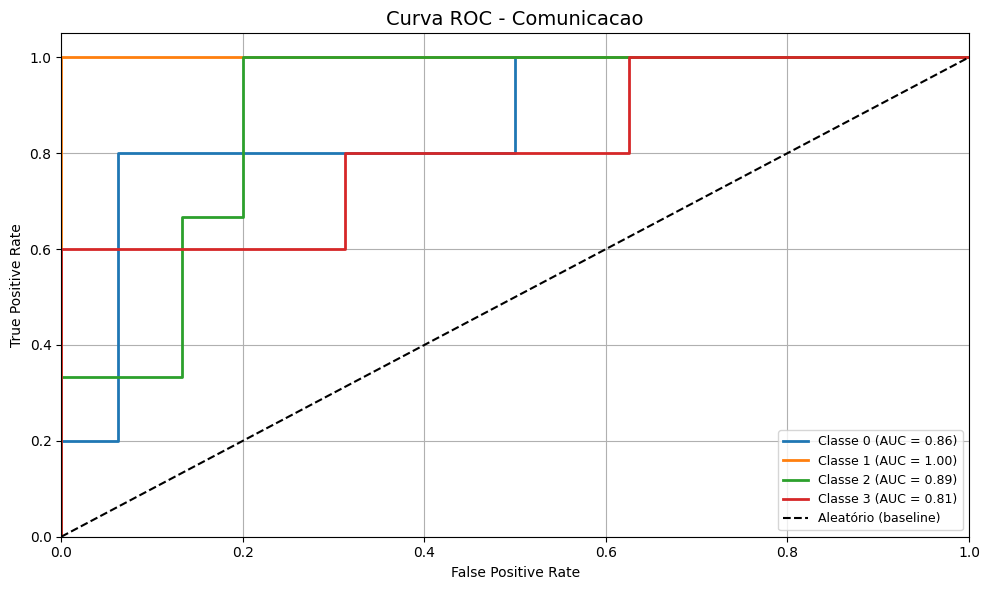

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import numpy as np

for area in areas_unicas:
    area = area.strip()  # remove espaços extras
    
    if area == "Linguagens": # pois Linguagens possui apenas 2 cursos e não é possível calcular a curva ROC para 2 classes
        continue
    
    y_true = np.array(modelos_por_area[area]['true_labels']) # rótulos verdadeiros
    y_proba = np.array(modelos_por_area[area]['predict_proba']) # probabilidades de predição

    # binarizar os rótulos
    classes = np.unique(y_true)
    n_classes = len(classes)
    y_true_bin = label_binarize(y_true, classes=classes)
    

    fpr = {}
    tpr = {}
    roc_auc = {}
    gini_coefficient = {} 
    ngc = {}

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        
        gini_coefficient[i] = 2 * roc_auc[i] - 1
        ngc[i] = gini_coefficient[i]

    plt.figure(figsize=(10, 6))
    colors = get_cmap('tab10')

    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i],
                color=colors(i),
                lw=2,
                label=f'Classe {i} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=1.5, label='Aleatório (baseline)')

    plt.title(f'Curva ROC - {area}', fontsize=14)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.grid(True)
    plt.legend(loc='lower right', fontsize=9)
    plt.tight_layout()

    # salva os gráficos 
    plt.savefig(f'./imagens/{area}.png', dpi=300, bbox_inches='tight')
    plt.show()
